In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0


In [5]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(iris_data[['sepal length (cm)','petal length (cm)']]\
                                                ,iris_data[['target']],test_size = 0.3,random_state = 0)

In [16]:
y_test.shape

(30, 1)

In [17]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [20]:
from sklearn.svm import SVC

In [21]:
svm = SVC(kernel='linear',probability=True)

In [22]:
svm.fit(x_train_std,y_train['target'].values)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [23]:
svm.predict(x_test_std)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [24]:
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [27]:
error = 0
for i, v in enumerate(svm.predict(x_test_std)):
    if v!= y_test['target'].values[i]:
        error+=1
print(error)

0


In [28]:
svm.predict_proba(x_test_std)

array([[0.94807891, 0.05192109],
       [0.00720962, 0.99279038],
       [0.97297364, 0.02702636],
       [0.00621738, 0.99378262],
       [0.01604827, 0.98395173],
       [0.11305686, 0.88694314],
       [0.98383967, 0.01616033],
       [0.00464296, 0.99535704],
       [0.00833998, 0.99166002],
       [0.01490196, 0.98509804],
       [0.02297062, 0.97702938],
       [0.02849471, 0.97150529],
       [0.00774563, 0.99225437],
       [0.97981935, 0.02018065],
       [0.9611144 , 0.0388856 ],
       [0.940058  , 0.059942  ],
       [0.9879354 , 0.0120646 ],
       [0.87159309, 0.12840691],
       [0.97986512, 0.02013488],
       [0.95500065, 0.04499935],
       [0.94807891, 0.05192109],
       [0.03287207, 0.96712793],
       [0.94804036, 0.05195964],
       [0.03529758, 0.96470242],
       [0.96636557, 0.03363443],
       [0.96875933, 0.03124067],
       [0.96108524, 0.03891476],
       [0.01989845, 0.98010155],
       [0.0378672 , 0.9621328 ],
       [0.00579087, 0.99420913]])

In [29]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


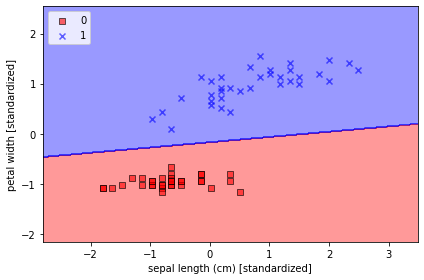

In [31]:
plot_decision_regions(x_train_std, y_train['target'].values, classifier=svm)
plt.xlabel('sepal length (cm) [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()